<a href="https://colab.research.google.com/github/rhuancborges/MisterioDoLimoeiro/blob/main/problema1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Prática 1 (AP1)
### GCC118 - Programação Matemática


**Nome**: Rhuan Campideli Borges (202210075)

**Turma**: 10A





# Enunciado - Problema 1

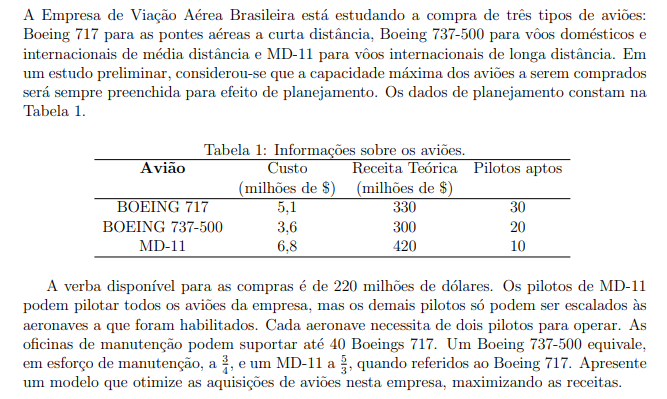

# Modelagem Matemática

## Dados

Para iniciar nossa modelagem, podemos retirar do enunciado do problema três dados importantes:

*   $c$ -> custos (em milhões de reais) de cada um dos tipos de aeronaves;
*   $r$ -> receitas (em milhões de reais) geradas por cada um dos tipos aeronaves;
*   $v$ -> a verba disponível (em milhões de reais).
*   $i \in \{1,2,3\}$ -> Tipos de aeronave;
*   $e$ -> esforços de manutenção de cada tipo de aeronave;
*   $E$ -> capacidade máxima (de esforço) da oficina de manutenção;
*   $p$ -> quantidade de pilotos aptos para cada tipo de aeronave.

\\
**Vetor de custos ($c$)**:
$$
\mathbf{c} = \begin{pmatrix} 5.1 \\ 3.6 \\ 5.8 \end{pmatrix}
$$

**Vetor de custos ($r$)**:
$$
\mathbf{r} = \begin{pmatrix} 330 \\ 300 \\ 400 \end{pmatrix}
$$

\\

**Valor de verba($v$)**:
$$
\mathbf{v} = 220
$$

\\

**Vetor de esforços($e$)**:
$$
\mathbf{e} = \begin{pmatrix} 1 \\ \frac{3}{4} \\ \frac{5}{3} \end{pmatrix}
$$

\\

**Valor de esforço máximo($E$)**:
$$
\mathbf{E} = 40
$$

\\

**Vetor de pilotos aptos($p$)**:
$$
\mathbf{p} = \begin{pmatrix} 30 \\ 20 \\ 10 \end{pmatrix}
$$

\\

## Variáveis de decisão

As variáveis do problema (e também aquilo que queremos determinar) é a quantidade de cada tipo de aeronave a ser comprada. Sendo assim, tem-se:

**Vetor de variáveis ($x$)**:
$$
\mathbf{x} = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix},
$$

sendo $x_1$ a quantidade de BOEING 717; $x_2$ a quantidade de BOEING 737-500; e $x_3$ a quantidade de MD-11.

\\

### Tipo

As variáveis são contínuas, ou seja, $x \geq 0 $.

\\

## Objetivo e função

O objetivo do problema é maximizar as receitas obtidas através das compras das aeronaves. Sendo assim, devemos **maximizar** a seguinte função:

$$
f(x) = r^Tx =  330x_1 + 300x_2 + 400x_3
$$

## Restrições

Podemos definir agora algumas restrições para o problema.

\\

#### **Restrições relacionadas à quantidade de pilotos**

Esta seção apresenta 4 restrições a respeito da quantidade de pilotos. Vale ressaltar que os 10 pilotos aptos para pilotar um MD-11 também são capazes de pilotar os outros tipos de aeronave (ou seja, **acrescentaremos isso nas restrições 1 e 2 abaixo**). Um outro detalhe importante a ser colocado nas restrições é que, para cada avião, 2 pilotos são "gastos". Desse modo, temos as seguintes restrições:

\\

1.   Quantidade de pilotos máxima que podem pilotar um BOEING 717 (30 aptos propriamente para o BOEING 717 e os 10 do MD-11):
$$
2x_1 \leq 40
$$

\\

2.   Quantidade de pilotos máxima que podem pilotar um BOEING 737-500 (20 aptos propriamente para o BOEING 737-500 e os 10 do MD-11):
$$
2x_2 \leq 30
$$

\\

3.   Quantidade de pilotos máxima que podem pilotar um MD-11:
$$
2x_3 \leq 10
$$

\\
4.   Quantidade total de pilotos aptos:
$$
2(x_1+x_2+x_3) \leq 60
$$

\\

#### **Restrição relacionada ao custo**
Esta seção calcula os custos relacionados a cada tipo de aeronave, limitados superiormente pela quantidade de verba disponível:
$$
5.1x_1 + 3.6x_2 + 5.8x_3 \leq 220
$$


#### **Restrição relacionada à manutenção**
Esta restrição está relacionada à capacidade da oficina de manutenção das aeronaves. O enunciado fornece que a oficina pode suportar até 40 BOEINGs 717 e o esforço de cada um dos tipos de aeronave está em função do BOEING 717. Dessa forma, podemos montar a inequação de restrição colocando os pesos relacionados ao esforço de cada tipo de aeronave multiplicados pelas quantidade de aeronaves, o que deve totalizar no máximo o peso de 40. Sendo assim:

$$
x_1 + \frac{3}{4}x_2 + \frac{5}{3}x_3 \leq 40
$$

## Instalação PuLP

In [ ]:
!pip install pulp
import pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 33.8 MB/s eta 0:00:00


## Parâmetros

*  Custos (em milhões de reais) de cada um dos tipos de aeronaves;
*  Receitas (em milhões de reais) geradas por cada um dos tipos aeronaves;
*  Verba disponível (em milhões de reais);
*  Tipos de aeronave (1,2,3);
*  Esforços de manutenção de cada tipo de aeronave;
*  Capacidade máxima (de esforço) da oficina de manutenção
*  Quantidade de pilotos aptos para cada tipo de aeronave

In [ ]:
custos = {
    1: 5.1,
    2: 3.6,
    3: 5.8
}

receitas = {
    1: 330,
    2: 300,
    3: 400
}

verba = 220

tipos = [1,2,3]

esforcos = {
    1: 1,
    2: 3.0/4.0,
    3: 5.0/3.0
}

esforco_max = 40

pilotos = {
    1: 30,
    2: 20,
    3: 10
}

## Declaração do objeto do modelo matemático

In [ ]:
modelo = pulp.LpProblem("aeronaves", pulp.LpMaximize)

## Variáveis de decisão

* $x_{1} \ge 0, x_2 \ge 0, x_3 \ge 0$: quantidade de vezes que cada tipo de aeronave foi comprada


In [ ]:
x_var = pulp.LpVariable.dicts("x", tipos, lowBound=0)

## Função Objetivo

Maximizar $f(x_1, x_2, x_3) = 330x_1 + 300x_2 + 400x_3$

In [ ]:
modelo += receitas[1]*x_var[1] + receitas[2]*x_var[2] + receitas[3]*x_var[3]

## Restrições

**Restrições relacionadas à quantidade de pilotos**
1.   Quantidade de pilotos máxima que podem pilotar um BOEING 717 (30 aptos propriamente para o BOEING 717 e os 10 do MD-11):
$$
2x_1 \leq 40
$$

\\

2.   Quantidade de pilotos máxima que podem pilotar um BOEING 737-500 (20 aptos propriamente para o BOEING 737-500 e os 10 do MD-11):
$$
2x_2 \leq 30
$$

\\

3.   Quantidade de pilotos máxima que podem pilotar um MD-11:
$$
2x_3 \leq 10
$$

\\
4.   Quantidade total de pilotos aptos:
$$
2(x_1+x_2+x_3) \leq 60
$$

\\


In [ ]:
modelo += 2*x_var[1] <= pilotos[1]+pilotos[3]
modelo += 2*x_var[2] <= pilotos[2]+pilotos[3]
modelo += 2*x_var[3] <= pilotos[3]
modelo += 2*(x_var[1]+x_var[2]+x_var[3]) <= pilotos[1]+pilotos[2]+pilotos[3]

**Restrição relacionada ao custo**
$$
5.1x_1 + 3.6x_2 + 5.8x_3 \leq 220
$$


In [ ]:
modelo += custos[1]*x_var[1] + custos[2]*x_var[2] + custos[3]*x_var[3] <= verba

**Restrição relacionada à manutenção**
$$
x_1 + \frac{3}{4}x_2 + \frac{5}{3}x_3 \leq 40
$$

In [ ]:
modelo += x_var[1]*esforcos[1] + x_var[2]*esforcos[2] + x_var[3]*esforcos[3] <= esforco_max

### Resolvendo o problema

In [ ]:
status = modelo.solve()

### Imprimindo solução do problema

In [ ]:
print("Status: ", pulp.LpStatus[status])
print("Função Objetivo: ", modelo.objective.value())
print("Soluções")
for i in tipos:
  print(f"\tAeronave tipo {i} -> Quantidade: {x_var[i].value()}")

Status:  Optimal
Função Objetivo:  10100.0
Soluções
	Aeronave tipo 1 -> Quantidade: 20.0
	Aeronave tipo 2 -> Quantidade: 5.0
	Aeronave tipo 3 -> Quantidade: 5.0
